<a href="https://colab.research.google.com/github/GowriShankarG/MTech_AIML/blob/master/ACI_Assignment2_Work_inProgress_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

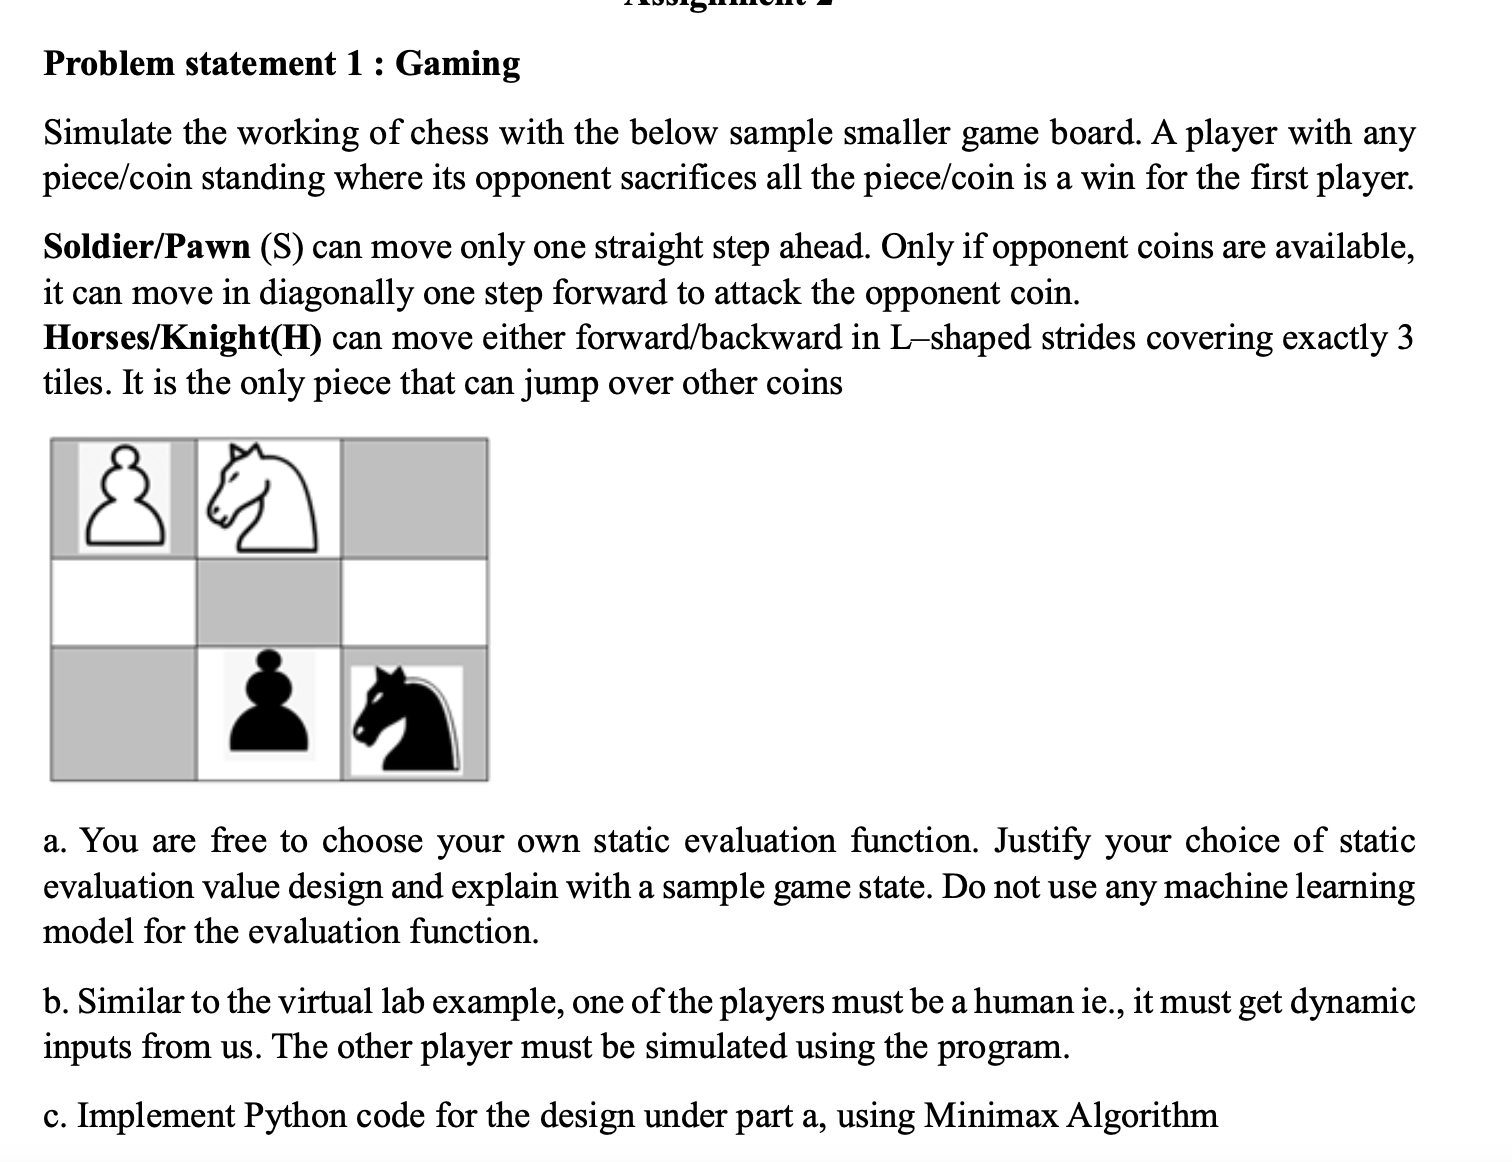

In [6]:
#import the libraries
#!/usr/bin/env python3
from math import inf as infinity
from random import choice
import platform
import time
from os import system
import copy

In [7]:
# Initializating the environment
##
# SCORES
S=1 # if soldier present in the state, +1 added to the score
H=3 # if the Horse present in the state, +3 added to the score. Horse given more weight

# Initial state of the board
# WS - white soldier, WH - While Horse, BS - Black Soldier, BH - Black Horse
board = [
    ['WS', 'WH', '--'],
    ['--', '--', '--'],
    ['--', 'BS', 'BH'],
]

# derived variables
board_rows_count = len(board)
board_cols_count = len(board[0]) if board_rows_count > 0 else 0

print("DEBUG: Rows Count:", board_rows_count)
print("DEBUG: Columns Count:", board_cols_count)

DEBUG: Rows Count: 3
DEBUG: Columns Count: 3


In [8]:
# print board of current state
def print_board(board):
  str_line = '---------------------------------------------------------------'
  ir=-1;
  print('\n' + str_line)
  for row in board:
    ir=ir+1;
    ic=-1;
    for cell in row:
      ic=ic+1
      print(f'|     ({cell}) [{ir} {ic}]    |', end='')
    print('\n' + str_line)

print_board(board)


---------------------------------------------------------------
|     (WS) [0 0]    ||     (WH) [0 1]    ||     (--) [0 2]    |
---------------------------------------------------------------
|     (--) [1 0]    ||     (--) [1 1]    ||     (--) [1 2]    |
---------------------------------------------------------------
|     (--) [2 0]    ||     (BS) [2 1]    ||     (BH) [2 2]    |
---------------------------------------------------------------


In [9]:
# get score from the current state of boards
def get_current_scores(board,choice):
  wscore=0 # white coins score
  bscore=0 # Black coins score

  for row in board:
    for cell in row:
      if cell == 'WS':
        wscore= wscore + 1
      elif cell == 'WH':
        wscore = wscore + 3
      elif cell == 'BS':
        bscore = bscore + 1
      elif cell == 'BH':
        bscore = bscore + 3
      else:
        None

  # return score based on the choice

  if choice == 'W':
    #print(f'DEBUG: get_current_scores - score {wscore-bscore}')
    return wscore-bscore
  else:
    #print(f'DEBUG: get_current_scores - score {bscore-wscore}')
    return bscore-wscore



In [10]:
# getting input from human with validation
def get_human_input(inflight_board_state,choice):
  attempts = 0
  while attempts < 5:
    try:
      #user_piece_input = input("Enter coin that need to move (e.g., for solider - S, for Horse - H ): ")
      fromCell_input = input("Enter chess coin **from cell position** (e.g., (1, 2)): ")
      toCell_input = input("Enter chess coin ** to move cell position ** (e.g., (1, 2)): ")

      #evaluate the inputs
      fromCell_tuple = eval(fromCell_input)
      toCell_tuple = eval(toCell_input)

      curr_pos_coin = inflight_board_state[fromCell_tuple[0]][fromCell_tuple[1]]
      #print("DEBUG : coin of the current position", curr_pos_coin)
      #print("DEBUG : from board choice  : ",curr_pos_coin[0])
      user_piece_input = curr_pos_coin[1] # second char to provide S or H, coin type
      #print("DEBUG : user_piece_input ",user_piece_input)
      #print("DEBUG : from user choice ",choice)

      #check for valid inputs strings
      if isinstance(toCell_tuple, tuple) and isinstance(fromCell_tuple, tuple):
          #check if the inputs are with in the board
          #print("DEBUG : cell input x: ", toCell_tuple[0])
          #print("DEBUG : cell input y: ", toCell_tuple[1])
          if ( 0 <= toCell_tuple[0] < board_rows_count) and (0 <= toCell_tuple[1] < board_cols_count):
                # check for Soldier valid moves
                if (user_piece_input == 'S'):
                  movestat=soldier_move(inflight_board_state,choice, fromCell_tuple, toCell_tuple)
                  if movestat == 'OK':
                    return user_piece_input, fromCell_tuple, toCell_tuple
                  else:
                    print("Invalid input and Soldier move is invalid")
                #check for horse valid moves
                elif (user_piece_input == 'H'):
                  movestat1=horse_mov(inflight_board_state,choice, fromCell_tuple, toCell_tuple)
                  if movestat1 == 'OK':
                    return user_piece_input, fromCell_tuple, toCell_tuple
                  else:
                    print("Invalid input and Horse move is invalid.")
                # obsolute condition. kept for consistency of if
                else:
                  print("Invalid input. Please enter a valid cooridnates with in the board.....")
          else:
            print("Invalid input. Please enter a valid cooridnates with in the board.")
      else:
        print("Invalid input. Please enter a valid cooridnates...................")
    except (SyntaxError, NameError, TypeError):
      print("Invalid input format. Please enter a tuple like (1, 2) and verify the board for details.")
    except Exception as e:
      print(f"Invalid input format. An error occurred: {e}")
    attempts += 1
  print("Too many invalid attempts. Max allowed is 5. Exiting from inputs taking.")

  return None,None,None


# define human choice playing game
def human_turn(inflight_board_state,choice):
  # get the current scores
  #print("DEBUG: in human turn function...")
  wcnt2, bcnt2 = evaluate_board(inflight_board_state,choice)

  if choice == 'W':
    curr_score = wcnt2
  else:
    curr_score = bcnt2


  allPos = get_coin_pos_and_tar(inflight_board_state,choice)
  no_of_moves_possible = len(allPos)
  if no_of_moves_possible == 0:
    print(f' Sorry. You lost. no more moves left.')
    print(f' closing the play..')
    print_board(inflight_board_state)
    return None


  # if score is <= zero, no coins left, game over
  if curr_score <= 0:
    print("DEBUG: You have no coins left..")
    print_board(inflight_board_state)
    return

  print_board(inflight_board_state)
  coin, fromCell, toCell  = get_human_input(inflight_board_state,choice)
  if fromCell != None and toCell != None:
    #print("DEBUG : from cell value ",inflight_board_state[fromCell[0]][fromCell[1]])
    #print("DEBUG : to cell value ",inflight_board_state[toCell[0]][toCell[1]])
    tmpBoard = get_newboard_after_move(inflight_board_state, fromCell, toCell)
    return tmpBoard
  else:
    print(f'DEBUG: no move found ...inputs given fromcell value : {fromCell} and tocell value : {toCell}')
    exit()

  return None



In [11]:
# to debug human turn
#human_turn(board,'W')


In [12]:
# update board with move and retrun new board
def get_newboard_after_move(inflight_board_state, fromCell, toCell):
  # copy the asis board
  #print("DEBUG: Newboard move function....")
  toCell_value = inflight_board_state[toCell[0]][toCell[1]]
  fromCell_value = inflight_board_state[fromCell[0]][fromCell[1]]
  #print(f'DEBUG: to cell value {toCell_value}')
  #print(f'DEBUG: from cell value {fromCell_value}')

  targetBoard = copy.deepcopy(inflight_board_state)
  targetBoard[toCell[0]][toCell[1]]=inflight_board_state[fromCell[0]][fromCell[1]]
  targetBoard[fromCell[0]][fromCell[1]]="--"

  #print("DEBUG: get_newboard_after_move  ..")
  #print_board(targetBoard)

  return targetBoard

In [13]:
# get all possible moves by choices
def get_coin_pos_and_tar(inflight_board_state, choice):
  tmplst=[]

  i=-1
  for row in inflight_board_state:
    i=i+1
    j=-1
    for cell in row:
      j=j+1
      if cell[0] == choice:
        #print("DEBUG: cell value", cell)
        if cell[1] == 'S':
          t1=(i,j)
          for tar1 in all_sol_target_pos(inflight_board_state, choice, t1):
            tmplst.append((t1,tar1,"sol"))
        elif cell[1] == 'H':
          t2=(i,j)
          for tar2 in all_hor_target_pos(inflight_board_state, choice, t2):
            tmplst.append((t2,tar2,"hor"))

  return tmplst


In [14]:
#all_sol_target_pos(board, 'B', (2, 1))
#all_hor_target_pos(board, 'B', (2, 2))

In [15]:
# horse move
def horse_mov(inflight_board_state,choice, curr_pos, new_pos):
    #print("DEBUG: in Horse move...")
    #print("DEBUG: choie given ",choice)
    #print("DEBUG: curr_pos is ",curr_pos)
    #print("DEBUG: new_pos is ",new_pos)

    horse_moves = [
          (-2, -1), (-2, 1), (-1, -2), (-1, 2),
          (1, -2), (1, 2), (2, -1), (2, 1)
      ]
    chg_pos = tuple(x - y for x, y in zip(new_pos, curr_pos))
    #print(f'DEBUG : xdirection len -> {chg_pos[0]} <-  ydirection len -> {chg_pos[1]} <-')
    #print(f'new position coin : {board[new_pos[0]][new_pos[1]]}')

    for i in horse_moves:
      #print("DEBUG: Valid moves ",i)
      if (i == chg_pos):
        #print("DEBUG: right move")
        return 'OK'

    return 'NOTOK'

In [16]:
# solider moves
def soldier_move(inflight_board_state,choice, curr_pos, new_pos):
  # if white move forwards direction else negtive direction
  wforward=(1,0); bforward=(-1,0) # valid forward directions
  wleftdiag=(1,1); bleftdiag=(-1,-1) # valid if other coin there
  wrightdiag=(1,-1); bleftdiag=(-1,1) # valid if there other coin

  #print("DEBUG: in Soldier move...")
  #print("DEBUG: choie given ",choice)
  #print("DEBUG: curr_pos is ",curr_pos)
  #print("DEBUG: new_pos is ",new_pos)

  chg_pos = tuple(x - y for x, y in zip(new_pos, curr_pos))
  #print(f'DEBUG : soldier_move - xdirection len -> {chg_pos[0]} <-  ydirection len -> {chg_pos[1]} <-')
  #print(f'DEBUG: soldier_move - new position coin : {inflight_board_state[new_pos[0]][new_pos[1]]} at {new_pos}')
  #white coins moves
  if (choice == 'W'):
    # wayforward 1 postion and should be empty
    # wdiag and should not be empty
    if ((wforward == chg_pos) and (inflight_board_state[new_pos[0]][new_pos[1]] == "--")) or \
      ((inflight_board_state[new_pos[0]][new_pos[1]] != "--") and (wleftdiag == chg_pos)) or \
      ((inflight_board_state[new_pos[0]][new_pos[1]] != "--") and (wrightdiag == chg_pos)):
        #print("DEBUG : right move")
        return 'OK'

  #black coins moves
  if (choice == 'B'):
    if ((bforward == chg_pos) and (inflight_board_state[new_pos[0]][new_pos[1]] == "--"))or \
      ((inflight_board_state[new_pos[0]][new_pos[1]] != "--") and (bleftdiag == chg_pos)) or \
      ((inflight_board_state[new_pos[0]][new_pos[1]] != "--") and (bleftdiag == chg_pos)):
        #print("DEBUG : right move")
        return 'OK'

  return 'NOTOK'



In [17]:
#soldier_move(board,'W', (0, 0), (1, 1))

In [18]:
# get all sol target positions
def all_sol_target_pos(inflight_board_state, choice, curr_pos):
  sol_target=[]

  i=-1
  for row in inflight_board_state:
    i=i+1
    j=-1
    for cell in row:
      j=j+1
      #print(f' at cell {i},{j} and value {cell[0]}')
      if cell[0] != choice:
        t1=(i,j)
        #print(f'DEBUG: all_sol_target_pos check validity for {curr_pos} --> {t1}')
        s1=soldier_move(inflight_board_state,choice, curr_pos, t1)
        #print(f'DEBUG: validity status -> {s1}')
        #print("--------->",s1)
        if s1=='OK':
          sol_target.append(t1)

  #print("DEBUG : all_sol_target_pos --> ",sol_target)

  return sol_target

In [19]:
#tboard = [
#    ['WS', 'WH', '--'],
#    ['--', 'BS', '--'],
#    ['--', '--', 'BH'],
#]
#all_sol_target_pos(tboard, 'W',(0,0))

In [20]:
# get all horse target positions
def all_hor_target_pos(inflight_board_state, choice, curr_pos):
  hor_target=[]

  i=-1
  for row in inflight_board_state:
    i=i+1
    j=-1
    for cell in row:
      j=j+1
      if cell[0] != choice:
        t1=(i,j)
        #print("DEBUG: cell value", cell, t1)
        h1=horse_mov(inflight_board_state,choice, curr_pos, t1)
        #print("--------->",s1)
        if h1=='OK':
          hor_target.append(t1)

  #print("DEBUG all_hor_target_pos: ",hor_target)

  return hor_target

In [21]:
# get the best move from minmax alog
def minmax(inflight_board_state,choice, searchDepth, maximizing_player):
  # get coin details
  #print("\n\n >>>>>>>>>>>>>>>>>>>")
  #print(f' board at start-> {inflight_board_state}')

  if searchDepth == 0:
      #print("DEBUG: the move from minmax")
      score = get_current_scores(inflight_board_state, choice)
      #print(f"DEBUG : minmax - score at depth 0 is {score}")
      return score, None

  if maximizing_player:
    #print("DEBUG : Starting maxmization ... at Search Depth #############> ",searchDepth)
    #print("DEBUG : ---------------------------------------------------------")
    maxEval = -infinity
    best_move = None
    allPos = get_coin_pos_and_tar(inflight_board_state,choice)
    #print(f'DEBUG: all positions of the status {allPos} with choice {choice}')
    if choice == 'B':
      tchoice='W'
    else:
      tchoice='B'
    for c1 in allPos:
      newboard = get_newboard_after_move(inflight_board_state, c1[0], c1[1])
      #print(f'DEBUG: Max - from cell : {c1[0]} to cell : {c1[1]} for entry {c1}')
      #print_board(inflight_board_state)
      #print_board(newboard)
      val, move = minmax(newboard, tchoice, searchDepth -1,False )
      if val >= maxEval:
        maxEval=val
        best_move = c1
      #print(f'DEBUG: Max - score value ->{maxEval}<- at move {best_move} at depth {searchDepth} for pos {c1}')
      #print("DEBUG: ...........done with maximize............\n\n")
    return maxEval, best_move
  else:
      minEval = infinity
      best_move = None
      #print("DEBUG: Starting minimiaztion ... at Search Depth ************>",searchDepth)
      #print("DEBUG : ---------------------------------------------------------")
      allPos = get_coin_pos_and_tar(inflight_board_state,choice)
      #print(f'DEBUG: all positions of the status {allPos} with choice {choice}')
      if choice == 'B':
        tchoice='W'
      else:
        tchoice='B'
      for c2 in allPos:
        newboard1 = get_newboard_after_move(inflight_board_state, c2[0], c2[1])
        #print(f'DEBUG: Min - from cell : {c2[0]} to cell : {c2[1]} for entry {c2}')
        #print_board(inflight_board_state)
        #print_board(newboard1)
        val, move = minmax(newboard1, tchoice, searchDepth-1 ,True )
        if val <= minEval:
          minEval = val
          best_move = c2
        #print(f'DEBUG: Min - score value ->{minEval}<- at move {best_move} at depth {searchDepth} for pos {c2}')
        #print("DEBUG: ...........done with minize............\n\n")


      return minEval, best_move


In [1]:
#tboard = [
#    ['--', 'BH', '--'],
#    ['--', '--', '--'],
#    ['WS', 'BS', '--'],
#]

#a1=minmax(tboard,'B',2, True )
#print(a1)
#print("from -->",a1[1][0])
#print("to -->",a1[1][1])

In [23]:
# define computer playing game
def comp_turn(inflight_board_state, choice):
  #print("DEBUG : computer turn with choice : ",choice)
  tmpBoard=None

  allPos = get_coin_pos_and_tar(inflight_board_state,choice)
  no_of_moves_possible = len(allPos)
  if no_of_moves_possible == 0:
    print(f' Computer have no more moves. You WON.')
    print(f' closing the play..')
    print_board(inflight_board_state)
    return None


  searchDepth=2 # hyper parameter
  get_best_move = minmax(inflight_board_state,choice,searchDepth, True)
  #print(f'DEBUG : computer move after minmax is -> {get_best_move}')

  fromCell = get_best_move[1][0]
  toCell = get_best_move[1][1]

  #print(f'DEBUG : computer move {fromCell} --> {toCell}')

  if fromCell != None and toCell != None:
    tmpBoard = get_newboard_after_move(inflight_board_state, fromCell, toCell)

  return tmpBoard


In [24]:
# evaluate board
def evaluate_board(inflight_board_state, h_choice):
  #print(f'DEBUG: evaluation of board at state -> {inflight_board_state}')

  wcnt=0 # white coins score
  bcnt=0 # Black coins score

  for row in board:
    for cell in row:
      if cell == 'WS' or cell == 'WH':
        wcnt = wcnt + 1
      elif cell == 'BS' or cell == 'BH':
        bcnt = bcnt + 1
      else:
        None

  # validate if atleast one white and black coin exist on board
  #
  if (wcnt == 0 and bcnt == 0) or (wcnt == 0) or (bcnt == 0) :
    print(f'** Both white coins and (or) Black coins are zero. Might be problem with board intialization. Check board input')
    print_board(inflight_board_state)
    print(f' Closing the play \n\n\n')
    exit()

  if ( h_choice == 'W' and bcnt == 0 ) or (h_choice == 'B' and wcnt == 0):
    print(f' ** You won **')
    print_board(inflight_board_state)
    print(f' Closing the play \n\n\n')
    exit()
  elif ( h_choice == 'B' and bcnt == 0 ) or (h_choice == 'W' and wcnt == 0):
    print(f' Sorry. You lost. Better luck next time. **')
    print_board(inflight_board_state)
    print(f' Closing the play \n\n\n')
    exit()

  # returning current white coin count and black coin count
  return wcnt, bcnt

In [25]:
def play_game(board):
    """
    Main function that calls all functions
    """
    h_choice = ''  # W or B - human choice, while or Black
    c_choice = ''  # W or B - computer choice, while or Black
    first = ''  # if human is the first

    # Human chooses White or Black to play
    while h_choice != 'W' and h_choice != 'B':
        try:
            print('')
            h_choice = input('Choose W (for white) or B (for Black) \nChosen: ').upper()
        except (EOFError, KeyboardInterrupt):
            print('Bye')
            exit()
        except (KeyError, ValueError):
            print('Bad choice')

    # Setting computer's choice
    if h_choice == 'W':
        c_choice = 'B'
    else:
        c_choice = 'W'

    # Human may starts first
    while first != 'Y' and first != 'N':
        try:
            first = input('First to start?[y/n]: ').upper()
        except (EOFError, KeyboardInterrupt):
            print('Bye')
            exit()
        except (KeyError, ValueError):
            print('Bad choice')

    if first == 'Y':
      print("You have choose to start First, with choice of coins as white - W ; B - Black ==>",h_choice)
    else:
      print("You have choose to start Second, with choice of coins as white - W ; B - Black ==>",h_choice)

    # Main loop of this game
    t1=0
    newboard=copy.deepcopy(board) # at the initial stage of the board
    print("\n+-------------------------------------------------------------+")
    print(f'starting play.............')
    print_board(newboard)
    print("\n+-------------------------------------------------------------+")
    wcnt1, bcnt1 = evaluate_board(newboard, h_choice)

    while wcnt1 >= 0 and bcnt1 >= 0:
      if first == 'N':
        print(f'\n\nComputer turn .....')
        newboard = comp_turn(newboard, c_choice)
        if newboard == None:
          break
        wcnt, bcnt = evaluate_board(newboard, h_choice)
        first = ''

      print(f'\n\nHuman turn .....')
      newboard = human_turn(newboard,h_choice)
      if newboard == None:
         break
      print_board(newboard)
      wcnt, bcnt = evaluate_board(newboard, h_choice)

      print(f'\n\nComputer turn .....')
      newboard = comp_turn(newboard, c_choice)
      if newboard == None:
         break
      print_board(newboard)
      wcnt, bcnt = evaluate_board(newboard, h_choice)

      print("\n+-------------------------------------------------------------+\n")


    exit()



In [26]:
play_game(board)


Choose W (for white) or B (for Black) 
Chosen: W
First to start?[y/n]: y
You have choose to start First, with choice of coins as white - W ; B - Black ==> W

+-------------------------------------------------------------+
starting play.............

---------------------------------------------------------------
|     (WS) [0 0]    ||     (WH) [0 1]    ||     (--) [0 2]    |
---------------------------------------------------------------
|     (--) [1 0]    ||     (--) [1 1]    ||     (--) [1 2]    |
---------------------------------------------------------------
|     (--) [2 0]    ||     (BS) [2 1]    ||     (BH) [2 2]    |
---------------------------------------------------------------

+-------------------------------------------------------------+


Human turn .....

---------------------------------------------------------------
|     (WS) [0 0]    ||     (WH) [0 1]    ||     (--) [0 2]    |
---------------------------------------------------------------
|     (--) [1 0]    ||  

# problem statement 2

Problem statement 2: Logic
The figure below is a Decision Tree created to predict which water resource a location is most suitable to utilize. For example, if there is a case where a location has features: 120 mm/month rainfall, sandy aquifer, 10 km away from the perennial river, 20 km away from the lake, and 2 km away from the beach, could you decide which water resource suitable for the community to take from, rainfall, river water, lake, or groundwater? Use the below decision tree and create Prolog rules to predict which water source is best for the community under the given conditions. Take the attribute values from user by giving suitable user prompts and predict the water source.

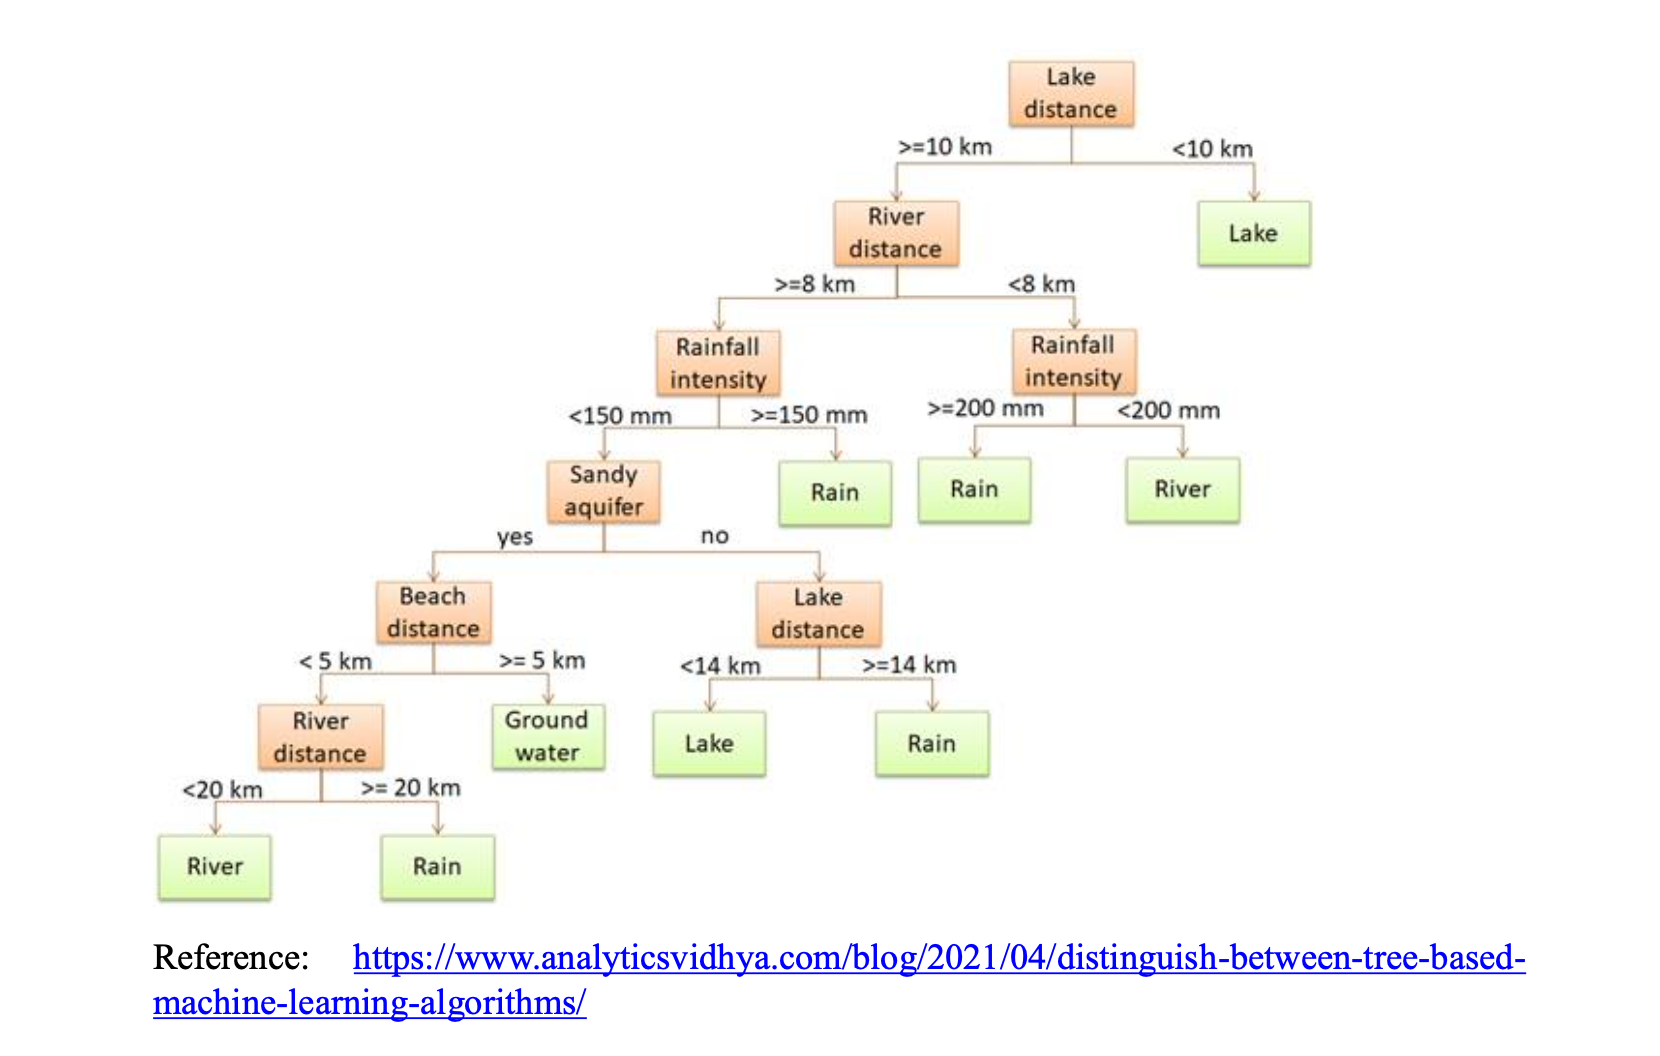